In [15]:
import pandas as pd
import numpy as np
import geopandas as gpd
import altair as alt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from dataprocessing import get_blockgroup_data, get_blockgroupshape

In [8]:
df = get_blockgroup_data()
gdf = get_blockgroupshape()

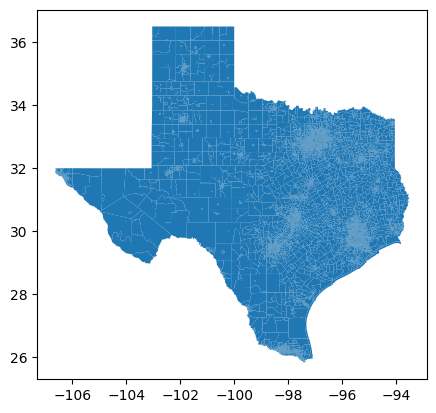

In [9]:
gdf.plot()
plt.show()

In [10]:
df

,Geo Index,Total Population,Area Name,Occupied Housing Units,Households Below Poverty Level,Block Group Centroid Latitude,Block Group Centroid Longitude,Classification,Percent Poverty Level,Households with No Vehicle Access,Percent No Vehicle Access,Closest_Record_ID,Distance_mi,Closest store type
0,1500000US480019501001,1196,Block Group 1; Census Tract 9501; Anderson Cou...,611,70,32.061828,-95.499394,Rural,0.114566,18,0.029460,1248999,0.183412,Large Grocery Store
1,1500000US480019501002,1962,Block Group 2; Census Tract 9501; Anderson Cou...,839,178,31.962629,-95.496465,Rural,0.212157,10,0.011919,1251813,6.146934,Supermarket
2,1500000US480019501003,1483,Block Group 3; Census Tract 9501; Anderson Cou...,477,62,31.974468,-95.612247,Rural,0.129979,20,0.041929,1251813,8.440466,Supermarket
3,1500000US480019504011,5782,Block Group 1; Census Tract 9504.01; Anderson ...,26,0,31.737602,-95.820261,Rural,0.000000,0,0.000000,1563983,9.359532,Large Grocery Store
4,1500000US480019504021,7115,Block Group 1; Census Tract 9504.02; Anderson ...,0,0,31.797573,-95.915255,Rural,NaN,0,NaN,1563983,14.260837,Large Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18633,1500000US485079503021,1928,Block Group 1; Census Tract 9503.02; Zavala Co...,576,285,28.662395,-99.820920,Urban,0.494792,20,0.034722,359935,1.416663,Supermarket
18634,1500000US485079503022,842,Block Group 2; Census Tract 9503.02; Zavala Co...,213,44,28.691480,-99.828843,Urban,0.206573,0,0.000000,359935,0.692748,Supermarket
18635,1500000US485079503023,1140,Block Group 3; Census Tract 9503.02; Zavala Co...,323,48,28.682627,-99.834051,Urban,0.148607,11,0.034056,359935,0.287784,Supermarket
18636,1500000US485079503024,869,Block Group 4; Census Tract 9503.02; Zavala Co...,237,80,28.683151,-99.826568,Urban,0.337553,10,0.042194,359935,0.211835,Supermarket


In [11]:
df['Low Income'] = np.where(df['Percent Poverty Level'] >= 0.2, 1, 0)
df

,Geo Index,Total Population,Area Name,Occupied Housing Units,Households Below Poverty Level,Block Group Centroid Latitude,Block Group Centroid Longitude,Classification,Percent Poverty Level,Households with No Vehicle Access,Percent No Vehicle Access,Closest_Record_ID,Distance_mi,Closest store type,Low Income
0,1500000US480019501001,1196,Block Group 1; Census Tract 9501; Anderson Cou...,611,70,32.061828,-95.499394,Rural,0.114566,18,0.029460,1248999,0.183412,Large Grocery Store,0
1,1500000US480019501002,1962,Block Group 2; Census Tract 9501; Anderson Cou...,839,178,31.962629,-95.496465,Rural,0.212157,10,0.011919,1251813,6.146934,Supermarket,1
2,1500000US480019501003,1483,Block Group 3; Census Tract 9501; Anderson Cou...,477,62,31.974468,-95.612247,Rural,0.129979,20,0.041929,1251813,8.440466,Supermarket,0
3,1500000US480019504011,5782,Block Group 1; Census Tract 9504.01; Anderson ...,26,0,31.737602,-95.820261,Rural,0.000000,0,0.000000,1563983,9.359532,Large Grocery Store,0
4,1500000US480019504021,7115,Block Group 1; Census Tract 9504.02; Anderson ...,0,0,31.797573,-95.915255,Rural,NaN,0,NaN,1563983,14.260837,Large Grocery Store,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18633,1500000US485079503021,1928,Block Group 1; Census Tract 9503.02; Zavala Co...,576,285,28.662395,-99.820920,Urban,0.494792,20,0.034722,359935,1.416663,Supermarket,1
18634,1500000US485079503022,842,Block Group 2; Census Tract 9503.02; Zavala Co...,213,44,28.691480,-99.828843,Urban,0.206573,0,0.000000,359935,0.692748,Supermarket,1
18635,1500000US485079503023,1140,Block Group 3; Census Tract 9503.02; Zavala Co...,323,48,28.682627,-99.834051,Urban,0.148607,11,0.034056,359935,0.287784,Supermarket,0
18636,1500000US485079503024,869,Block Group 4; Census Tract 9503.02; Zavala Co...,237,80,28.683151,-99.826568,Urban,0.337553,10,0.042194,359935,0.211835,Supermarket,1


In [12]:
df['Low Access - Vehicle'] = np.where(((df['Percent No Vehicle Access'] > 0.1) & (df['Distance_mi'] > 0.05)) | (df['Distance_mi'] > 20), 1, 0)
df

,Geo Index,Total Population,Area Name,Occupied Housing Units,Households Below Poverty Level,Block Group Centroid Latitude,Block Group Centroid Longitude,Classification,Percent Poverty Level,Households with No Vehicle Access,Percent No Vehicle Access,Closest_Record_ID,Distance_mi,Closest store type,Low Income,Low Access - Vehicle
0,1500000US480019501001,1196,Block Group 1; Census Tract 9501; Anderson Cou...,611,70,32.061828,-95.499394,Rural,0.114566,18,0.029460,1248999,0.183412,Large Grocery Store,0,0
1,1500000US480019501002,1962,Block Group 2; Census Tract 9501; Anderson Cou...,839,178,31.962629,-95.496465,Rural,0.212157,10,0.011919,1251813,6.146934,Supermarket,1,0
2,1500000US480019501003,1483,Block Group 3; Census Tract 9501; Anderson Cou...,477,62,31.974468,-95.612247,Rural,0.129979,20,0.041929,1251813,8.440466,Supermarket,0,0
3,1500000US480019504011,5782,Block Group 1; Census Tract 9504.01; Anderson ...,26,0,31.737602,-95.820261,Rural,0.000000,0,0.000000,1563983,9.359532,Large Grocery Store,0,0
4,1500000US480019504021,7115,Block Group 1; Census Tract 9504.02; Anderson ...,0,0,31.797573,-95.915255,Rural,NaN,0,NaN,1563983,14.260837,Large Grocery Store,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18633,1500000US485079503021,1928,Block Group 1; Census Tract 9503.02; Zavala Co...,576,285,28.662395,-99.820920,Urban,0.494792,20,0.034722,359935,1.416663,Supermarket,1,0
18634,1500000US485079503022,842,Block Group 2; Census Tract 9503.02; Zavala Co...,213,44,28.691480,-99.828843,Urban,0.206573,0,0.000000,359935,0.692748,Supermarket,1,0
18635,1500000US485079503023,1140,Block Group 3; Census Tract 9503.02; Zavala Co...,323,48,28.682627,-99.834051,Urban,0.148607,11,0.034056,359935,0.287784,Supermarket,0,0
18636,1500000US485079503024,869,Block Group 4; Census Tract 9503.02; Zavala Co...,237,80,28.683151,-99.826568,Urban,0.337553,10,0.042194,359935,0.211835,Supermarket,1,0


In [18]:
df['Food Desert USDA Vehicle'] = np.where((df['Low Income']==1) & (df['Low Access - Vehicle']==1), 1, 0)
df['Food Desert CDC'] = np.where(df['Distance_mi'] > 0.5, 1, 0)

In [19]:
df

,Geo Index,Total Population,Area Name,Occupied Housing Units,Households Below Poverty Level,Block Group Centroid Latitude,Block Group Centroid Longitude,Classification,Percent Poverty Level,Households with No Vehicle Access,Percent No Vehicle Access,Closest_Record_ID,Distance_mi,Closest store type,Low Income,Low Access - Vehicle,Food Desert USDA Vehicle,Food Desert CDC
0,1500000US480019501001,1196,Block Group 1; Census Tract 9501; Anderson Cou...,611,70,32.061828,-95.499394,Rural,0.114566,18,0.029460,1248999,0.183412,Large Grocery Store,0,0,0,0
1,1500000US480019501002,1962,Block Group 2; Census Tract 9501; Anderson Cou...,839,178,31.962629,-95.496465,Rural,0.212157,10,0.011919,1251813,6.146934,Supermarket,1,0,0,1
2,1500000US480019501003,1483,Block Group 3; Census Tract 9501; Anderson Cou...,477,62,31.974468,-95.612247,Rural,0.129979,20,0.041929,1251813,8.440466,Supermarket,0,0,0,1
3,1500000US480019504011,5782,Block Group 1; Census Tract 9504.01; Anderson ...,26,0,31.737602,-95.820261,Rural,0.000000,0,0.000000,1563983,9.359532,Large Grocery Store,0,0,0,1
4,1500000US480019504021,7115,Block Group 1; Census Tract 9504.02; Anderson ...,0,0,31.797573,-95.915255,Rural,NaN,0,NaN,1563983,14.260837,Large Grocery Store,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18633,1500000US485079503021,1928,Block Group 1; Census Tract 9503.02; Zavala Co...,576,285,28.662395,-99.820920,Urban,0.494792,20,0.034722,359935,1.416663,Supermarket,1,0,0,1
18634,1500000US485079503022,842,Block Group 2; Census Tract 9503.02; Zavala Co...,213,44,28.691480,-99.828843,Urban,0.206573,0,0.000000,359935,0.692748,Supermarket,1,0,0,1
18635,1500000US485079503023,1140,Block Group 3; Census Tract 9503.02; Zavala Co...,323,48,28.682627,-99.834051,Urban,0.148607,11,0.034056,359935,0.287784,Supermarket,0,0,0,0
18636,1500000US485079503024,869,Block Group 4; Census Tract 9503.02; Zavala Co...,237,80,28.683151,-99.826568,Urban,0.337553,10,0.042194,359935,0.211835,Supermarket,1,0,0,0


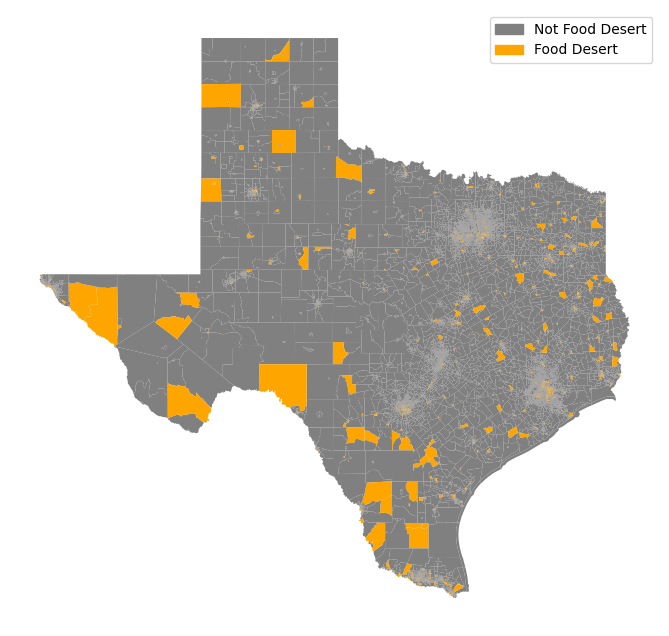

In [ ]:
## USDA with Vehicle Access
df_geo = pd.merge(df, gdf,left_on='Geo Index', right_on='GEOIDFQ', how='left')
df_geo = gpd.GeoDataFrame(df_geo, geometry='geometry')

fig, ax = plt.subplots(figsize=(10, 8))
cmap = ListedColormap(['gray', 'orange'])

df_geo.plot(column='Food Desert USDA Vehicle', cmap=cmap, legend=False, ax=ax)
ax.set_axis_off()

# custom legends
not_fd_patch = mpatches.Patch(color='gray', label='Not Food Desert')
fd_patch = mpatches.Patch(color='orange', label='Food Desert')

plt.legend(handles=[not_fd_patch, fd_patch], loc='upper right')

plt.show()

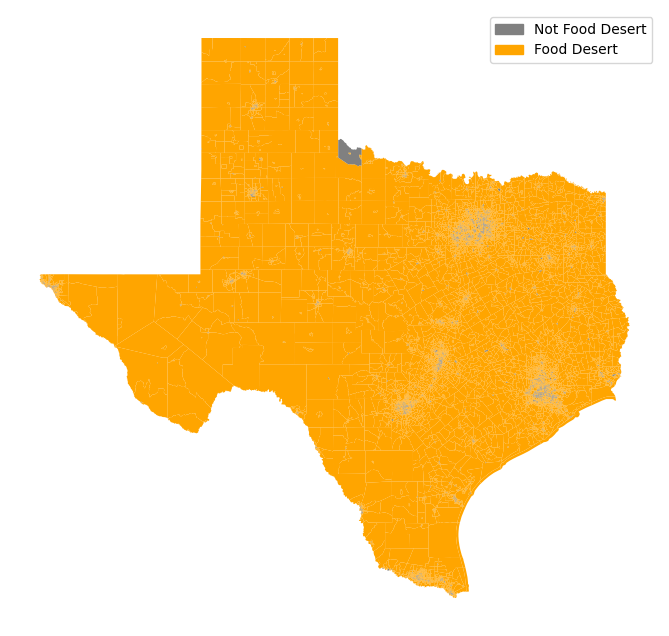

In [20]:
## CDC Definition
df_geo = pd.merge(df, gdf,left_on='Geo Index', right_on='GEOIDFQ', how='left')
df_geo = gpd.GeoDataFrame(df_geo, geometry='geometry')

fig, ax = plt.subplots(figsize=(10, 8))
cmap = ListedColormap(['gray', 'orange'])

df_geo.plot(column='Food Desert CDC', cmap=cmap, legend=False, ax=ax)
ax.set_axis_off()

# custom legends
not_fd_patch = mpatches.Patch(color='gray', label='Not Food Desert')
fd_patch = mpatches.Patch(color='orange', label='Food Desert')

plt.legend(handles=[not_fd_patch, fd_patch], loc='upper right')

plt.show()

In [51]:
bins = [0, 1000, 5000, 10000, 15000, 20000,  np.inf]
labels = ['<1,000', '<5,000', '<10,000', '<15,000', '<20,000', '20,000+']
df['Population Bins'] = pd.cut(df['Total Population'], bins=bins, labels=labels)

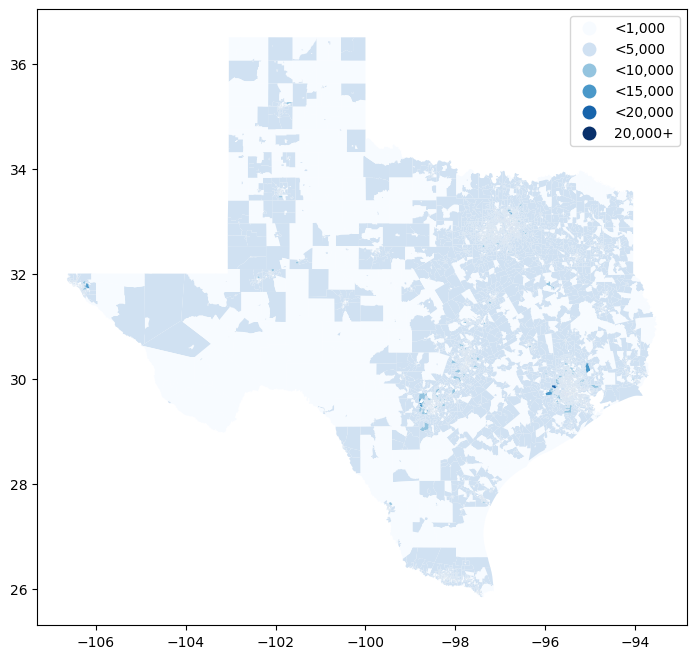

In [56]:
df_geo = pd.merge(df, gdf,left_on='Geo Index', right_on='GEOIDFQ', how='left')
df_geo = gpd.GeoDataFrame(df_geo, geometry='geometry')

fig, ax = plt.subplots(figsize=(10,8))
df_geo.plot(column='Population Bins', cmap='Blues', legend=True, ax=ax)
plt.show()

C:\Users\natal\AppData\Local\Temp\ipykernel_17232\388794659.py:11: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='center right', bbox_to_anchor=(1,0))
C:\Users\natal\AppData\Local\Temp\ipykernel_17232\388794659.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='center right', bbox_to_anchor=(1,0))


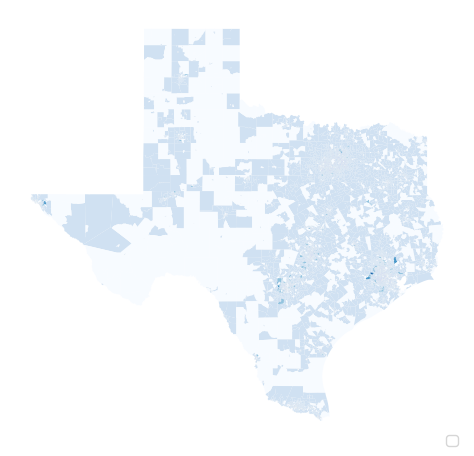

In [48]:
# Plotting population
df_geo = pd.merge(df, gdf,left_on='Geo Index', right_on='GEOIDFQ', how='left')
df_geo = gpd.GeoDataFrame(df_geo, geometry='geometry')

fig, ax = plt.subplots(figsize=(10,8))
fig = df_geo.plot(column='Population Bins', cmap='Blues', ax=ax, label='Population')
ax.set_axis_off()

pos = ax.get_position()
ax.set_position([pos.x0, pos.y0, pos.width, pos.height*.7])
ax.legend(loc='center right', bbox_to_anchor=(1,0))

plt.show()
